In [1]:
# We'll start with our library imports...
from __future__ import print_function
import pandas
import seaborn as sn
import numpy as np                 # to use numpy arrays
import tensorflow as tf            # to specify and run computation graphs
import tensorflow_datasets as tfds # to load training data
import matplotlib.pyplot as plt    # to visualize data and draw plots
from tqdm import tqdm              # to track progress of loops
from keras.datasets import cifar100
from keras import backend as k 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Dropout



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xitke0tj because the default path (/home/cse479/maxnguyen/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
(images, labels), (temp, temp1) = cifar100.load_data()
temp = temp /255.0
train_images, validation_images = images[45000:], images[:45000]
train_labels, validation_labels = labels[45000:], labels[:45000]


In [3]:
print(train_labels)

[[85]
 [92]
 [66]
 ...
 [ 3]
 [ 7]
 [73]]


In [4]:
img_rows, img_cols, img_width = 32, 32, 3
  
# if k.image_data_format() == 'channels_first': 
#    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols, img_width) 
#    validation_images = validation_images.reshape(validation_images.shape[0], 1, img_rows, img_cols, img_width) 
#    inpx = (img_rows, img_cols, img_width)
  
# else: 
#    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, img_width) 
#    validation_images = validation_images.reshape(validation_images.shape[0], img_rows, img_cols, img_width) 
#    inpx = (img_rows, img_cols, img_width) 
  
train_images = train_images.astype('float32') 
validation_images = validation_images.astype('float32') 
images = images.astype('float32')
images /= 255
train_images /= 255
validation_images /= 255
temp /= 255

In [5]:
train_labels = keras.utils.to_categorical(train_labels)
print(train_labels.shape)
validation_labels = keras.utils.to_categorical(validation_labels)
temp1 = keras.utils.to_categorical(temp1)
labels = keras.utils.to_categorical(labels)

(5000, 100)


In [6]:
input_shape = (img_rows, img_cols, img_width)

In [9]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
        input_shape=images.shape[1:], activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(512, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2048, activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 128)        

In [10]:
# using Sequential groups all the layers to run at once

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)
history = model.fit(train_images, train_labels, batch_size = 32, epochs=100, validation_data=(validation_images, validation_labels), callbacks = [es], shuffle=True, use_multiprocessing=(True))

Epoch 1/100
157/157 [==============================] - 37s 235ms/step - loss: 4.3723 - accuracy: 0.0470 - val_loss: 4.0743 - val_accuracy: 0.0810
Epoch 2/100
157/157 [==============================] - 12s 74ms/step - loss: 3.9148 - accuracy: 0.0984 - val_loss: 3.8908 - val_accuracy: 0.1082
Epoch 3/100
157/157 [==============================] - 12s 74ms/step - loss: 3.5615 - accuracy: 0.1622 - val_loss: 3.7786 - val_accuracy: 0.1399
Epoch 4/100
157/157 [==============================] - 12s 74ms/step - loss: 3.1073 - accuracy: 0.2390 - val_loss: 3.4780 - val_accuracy: 0.1878
Epoch 5/100
157/157 [==============================] - 12s 74ms/step - loss: 2.5586 - accuracy: 0.3442 - val_loss: 3.7839 - val_accuracy: 0.1811
Epoch 6/100
157/157 [==============================] - 12s 74ms/step - loss: 1.9196 - accuracy: 0.4872 - val_loss: 3.9151 - val_accuracy: 0.2166
Epoch 7/100
157/157 [==============================] - 12s 74ms/step - loss: 1.2924 - accuracy: 0.6400 - val_loss: 4.9195 - val_a

In [11]:
model.evaluate(validation_images, validation_labels)


1407/1407 [==============================] - 9s 7ms/step - loss: 9.7877 - accuracy: 0.1859


[9.787680625915527, 0.18586666882038116]

In [12]:
model.evaluate(temp, temp1)


313/313 [==============================] - 14s 43ms/step - loss: 14.7434 - accuracy: 0.0100


[14.743430137634277, 0.009999999776482582]

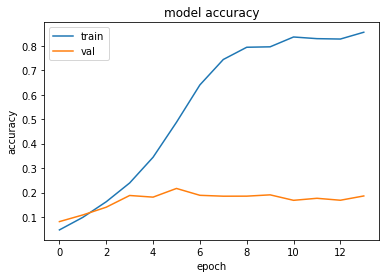

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

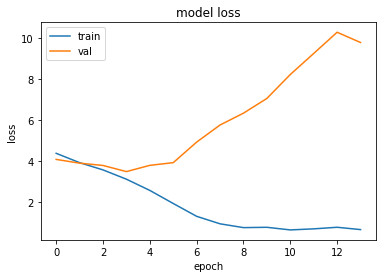

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.saved_model.save(model, 'homework1/cifar100-brute')